# 次に点が現れる位置を予測

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt

import numpy as np

from keras.models import Model
from keras.layers import Input, Dense, TimeDistributed
from keras.layers import SimpleRNN, LSTM, GRU

Using TensorFlow backend.


In [2]:
np.random.seed(42)

In [3]:
nb_train_batch = 40
nb_test_batch = 10
nb_batch = nb_train_batch + nb_test_batch
nb_step = 10
nb_dim = 2
total_step = nb_batch * nb_step + 1

In [4]:
max_horizon = 100
t = np.linspace(0., max_horizon, total_step)

In [5]:
X = (np.array([np.sin(t), np.cos(t)]) * (1 - t / (max_horizon * 1.) )).T
#X = X.reshape(nb_batch, nb_step, nb_dim)

In [6]:
XX = X[:-1].reshape(nb_batch, nb_step, nb_dim)
YY = X[1:].reshape(nb_batch, nb_step, nb_dim)

In [7]:
random_batch = np.random.permutation(nb_batch)

In [8]:
ix_train_batch = random_batch[:nb_train_batch]
ix_test_batch = random_batch[nb_train_batch:]
print('ix_train_batch = \n{0}'.format(ix_train_batch))
print('ix_test_batch = \n{0}'.format(ix_test_batch))

ix_train_batch = 
[13 39 30 45 17 48 26 25 32 19 12  4 37  8  3  6 41 46 47 15  9 16 24 34 31
  0 44 27 33  5 29 11 36  1 21  2 43 35 23 40]
ix_test_batch = 
[10 22 18 49 20  7 42 14 28 38]


In [9]:
X_train = XX[ix_train_batch]
Y_train = YY[ix_train_batch]

X_test = XX[ix_test_batch]
Y_test = YY[ix_test_batch]

In [10]:
print("X_train[0] = \n{0}\n\nY_triain[0] = \n{1}".format(X_train[0], Y_train[0]))
#print(Y_train[0])

X_train[0] = 
[[ 0.56429325  0.4787203 ]
 [ 0.64640024  0.35610495]
 [ 0.70235383  0.21998886]
 [ 0.73006926  0.07586086]
 [ 0.72859701 -0.07050106]
 [ 0.69815443 -0.21326133]
 [ 0.64011079 -0.34675954]
 [ 0.55692647 -0.4657348 ]
 [ 0.45204905 -0.56553308]
 [ 0.32977059 -0.64228915]]

Y_triain[0] = 
[[ 0.64640024  0.35610495]
 [ 0.70235383  0.21998886]
 [ 0.73006926  0.07586086]
 [ 0.72859701 -0.07050106]
 [ 0.69815443 -0.21326133]
 [ 0.64011079 -0.34675954]
 [ 0.55692647 -0.4657348 ]
 [ 0.45204905 -0.56553308]
 [ 0.32977059 -0.64228915]
 [ 0.19505217 -0.69307622]]


## 時系列データの可視化

In [11]:
def plot_sequence(X, title=""):
    '''時系列データの可視化'''
    fig, ax = plt.subplots(1, 2, figsize=(10, 4))
    
    ax[0].plot(X, 'o-')
    ax[0].set(title=title, ylim=[-1, 1])

    ax[1].scatter(X[:, 0], X[:, 1])
    ax[1].axis('square')
    ax[1].axis([-1, 1, -1, 1]);

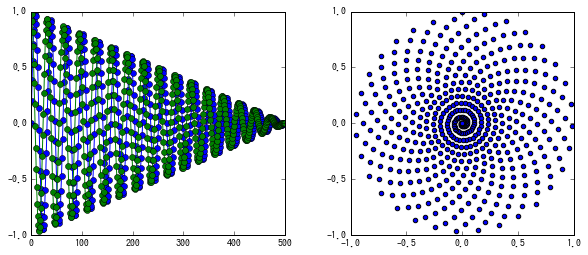

In [12]:
# 全体の時系列
plot_sequence(X)

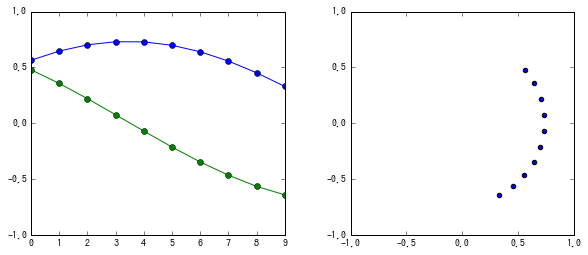

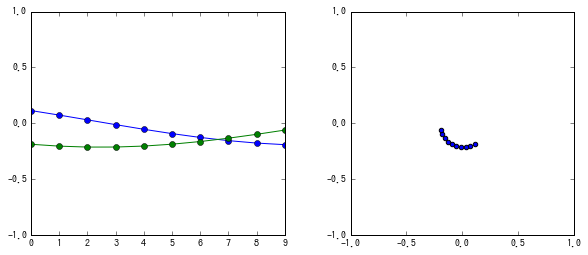

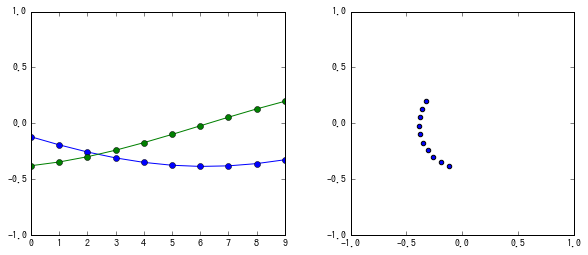

In [13]:
for ii in range(3):
    plot_sequence(X_train[ii])

## モデル構築

In [14]:
inputs = Input(shape=(nb_step, nb_dim))
x = SimpleRNN(50, return_sequences=True)(inputs)
outputs = TimeDistributed(Dense(2))(x)

model = Model(input=inputs, output=outputs)

In [15]:
model.compile(optimizer='rmsprop', loss='mean_squared_error', metrics=['accuracy'])

In [16]:
all_acc = []
all_loss = []

In [17]:
# このセルで Ctrl + Enter を何度か押すと、づづけて学習をすることができる。

nb_epoch = 10

history = model.fit(X_train, Y_train, nb_epoch=nb_epoch)
# 精度と損失関数の値を可視化のために記録
acc = history.history['acc']
loss = history.history['loss']
all_acc.extend(acc)
all_loss.extend(loss)

Epoch 1/10
40/40 [==============================] - 0s - loss: 0.1553 - acc: 0.6625     
Epoch 2/10
40/40 [==============================] - 0s - loss: 0.0876 - acc: 0.7750     
Epoch 3/10
40/40 [==============================] - 0s - loss: 0.0698 - acc: 0.8275     
Epoch 4/10
40/40 [==============================] - 0s - loss: 0.0593 - acc: 0.8625     
Epoch 5/10
40/40 [==============================] - 0s - loss: 0.0531 - acc: 0.8675     
Epoch 6/10
40/40 [==============================] - 0s - loss: 0.0486 - acc: 0.8775     
Epoch 7/10
40/40 [==============================] - 0s - loss: 0.0449 - acc: 0.8775     
Epoch 8/10
40/40 [==============================] - 0s - loss: 0.0446 - acc: 0.8675     
Epoch 9/10
40/40 [==============================] - 0s - loss: 0.0400 - acc: 0.8825     
Epoch 10/10
40/40 [==============================] - 0s - loss: 0.0349 - acc: 0.8900     


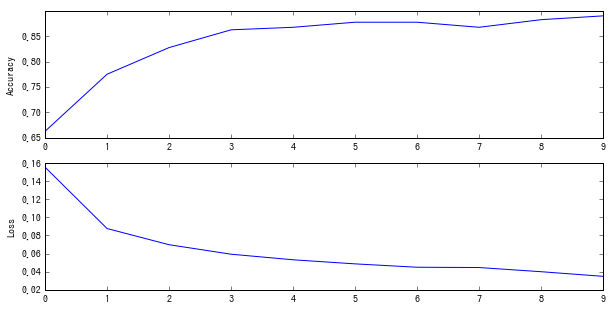

In [18]:
fig, ax = plt.subplots(2, 1, figsize=(10, 5))
ax[0].plot(all_acc)
ax[0].set(ylabel='Accuracy')
ax[1].plot(all_loss)
ax[1].set(ylabel='Loss')

## 予測

In [19]:
# トレーニングデータに対する予測
Y_train_pred = model.predict(X_train)

# テストデータに対する予測
Y_test_pred = model.predict(X_test)

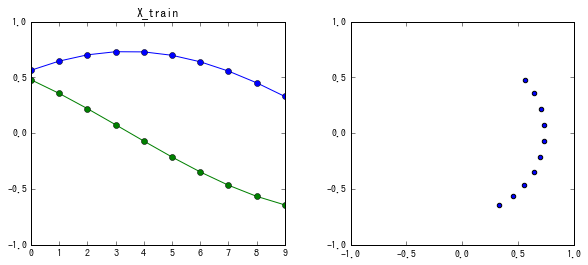

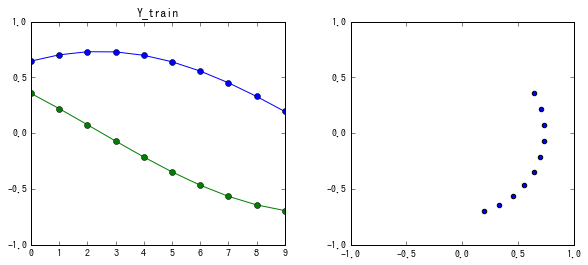

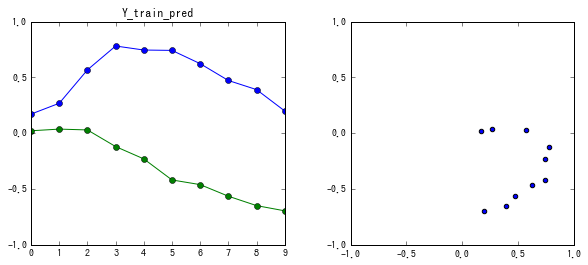

In [20]:
# トレーニングデータに対する予測

i_batch = 0

plot_sequence(X_train[i_batch], title='X_train')
plot_sequence(Y_train[i_batch], title='Y_train')
plot_sequence(Y_train_pred[i_batch], title='Y_train_pred')

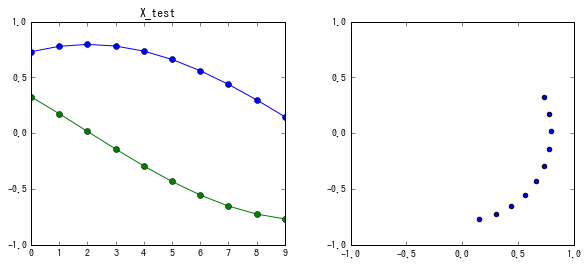

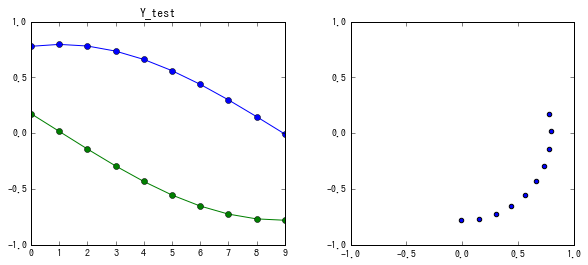

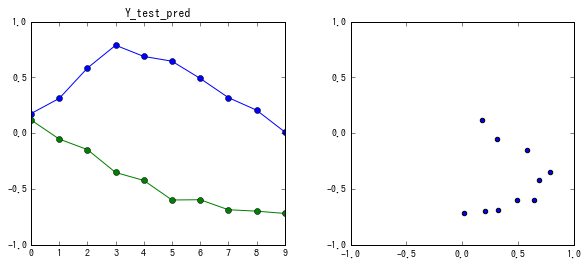

In [21]:
# テストデータに対する予測

i_batch = 0

plot_sequence(X_test[i_batch], title='X_test')
plot_sequence(Y_test[i_batch], title='Y_test')
plot_sequence(Y_test_pred[i_batch], title='Y_test_pred')

In [22]:
# Very first partial sequence
X_batch = XX[0][np.newaxis, :, :]

print(X_batch.shape)
print(X_batch)

(1, 10, 2)
[[[ 0.          1.        ]
  [ 0.19827199  0.97810644]
  [ 0.38786067  0.91737675]
  [ 0.56125462  0.8203836 ]
  [ 0.71161724  0.69113306]
  [ 0.83305627  0.53489928]
  [ 0.92085462  0.35800946]
  [ 0.97165343  0.1675876 ]
  [ 0.98358043 -0.02873233]
  [ 0.95631837 -0.22311246]]]


In [23]:
Y_batch = model.predict_on_batch(X_batch)

In [24]:
Y_batch

array([[[ 0.15509793, -0.30286127],
        [ 0.12745693,  0.29729772],
        [ 0.44625551,  0.56972849],
        [ 0.63477498,  0.73086202],
        [ 0.84176159,  0.49440536],
        [ 0.88784653,  0.36189404],
        [ 0.94930935,  0.26990327],
        [ 0.88319272, -0.11341181],
        [ 0.82324147, -0.44429097],
        [ 0.80282092, -0.43534911]]], dtype=float32)

In [25]:
# 全体予測
Y_pred = X[:nb_step]

In [26]:
for jj in range(total_step - nb_step):
    # 直近の予測をX_batchに入れてから予測
    y_pred = Y_batch[:, -1:, :]
    X_batch = np.concatenate([X_batch[:, 1:, :], y_pred], axis=1)                             
    Y_batch = model.predict_on_batch(X_batch)

    # すべての予測をここに記録
    Y_pred = np.concatenate([Y_pred, y_pred[0]], axis=0)
    
    #plot_sequence(X_batch[0])
    #plot_sequence(YY[1])
    #plt.pause(0.01)

In [27]:
Y_pred.shape

(501, 2)

In [28]:
from ipywidgets import interact, interactive, fixed, widgets

In [29]:
np.arange(10, 20)

array([10, 11, 12, 13, 14, 15, 16, 17, 18, 19])

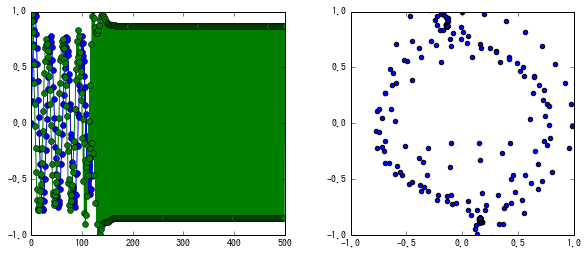

In [30]:
plot_sequence(Y_pred)

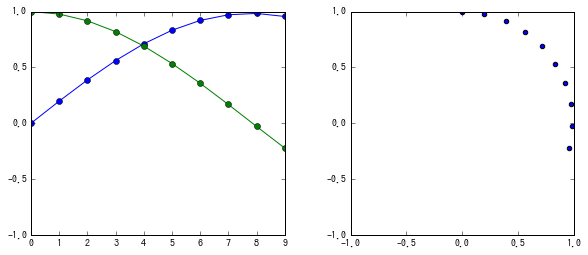

In [31]:
@interact(ii=widgets.IntSlider(min=0, max=total_step - nb_step, step=1, value=0))
def plot_subsequence(ii):
    plot_sequence(Y_pred[ii:ii + nb_step])